In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib as mpl
import seaborn as sns
import tushare as ts
%matplotlib inline
from pylab import mpl

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
ts.set_token('cbd6e8523ab447173804456466cb383da56f32cf5238f0922f946f0c')
pro = ts.pro_api('cbd6e8523ab447173804456466cb383da56f32cf5238f0922f946f0c')


#mpl.rcParams['font.family'] = 'serif'
sns.set()

In [2]:
sh_data = ts.pro_bar(pro_api=pro, ts_code='000001.SZ', start_date='2013-12-31', end_date='2015-04-14')[['date','close']]
sh_data.set_index('date',inplace=True)
sh_data.rename(columns={'close':'price'},inplace=True)
sh_data.index = pd.to_datetime(sh_data.index)
sh_data.head()

,price
date,
2013-12-31,6.621
2014-01-02,6.610
2014-01-03,6.448
2014-01-06,6.308
2014-01-07,6.286


In [3]:
sh_data['return'] = np.log(sh_data['price']/sh_data['price'].shift(1))

sh_data.head()

,price,return
date,,
2013-12-31,6.621,NaN
2014-01-02,6.610,-0.001663
2014-01-03,6.448,-0.024814
2014-01-06,6.308,-0.021951
2014-01-07,6.286,-0.003494


# 1.自相关性

自相关函数acf()与偏自相关函数pacf()

In [4]:
from statsmodels.tsa import stattools

#计算自相关系数
sh_data.dropna(inplace=True)
acfs = stattools.acf(sh_data['return'])
acfs[:6]

array([ 1.        , -0.01507378,  0.03591575,  0.00733351,  0.12069121,
       -0.13162265])

In [5]:
#计算偏自相关系数

pacfs = stattools.pacf(sh_data['return'])
pacfs[:6]

array([ 1.        , -0.01512256,  0.0359285 ,  0.00848843,  0.12139737,
       -0.13277025])

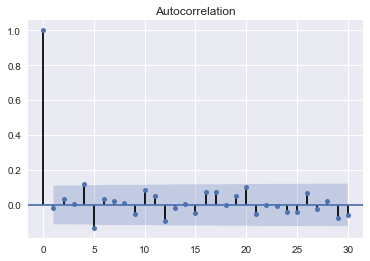

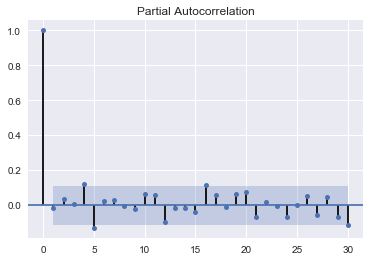

In [6]:
#绘制自相关和偏自相关系图

from statsmodels.graphics.tsaplots import *

plot_acf(sh_data['return'],use_vlines=True,lags=30);
plot_pacf(sh_data['return'],use_vlines=True,lags=30);

# 2.平稳性检验

2.1观察时间序列图

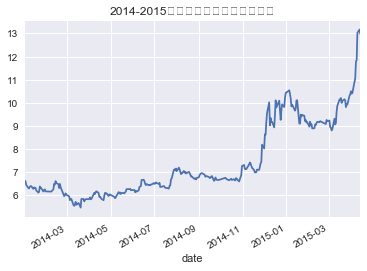

In [7]:
sh_data['price'].plot(title='2014-2015年上证综指收盘指数时序图')# 非平稳

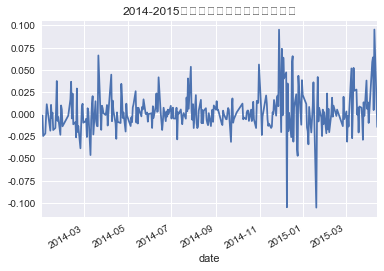

In [8]:
sh_data['return'].plot(title='2014-2015年上证综指收益率指数时序图')

2.2观察序列的自相关图和偏自相关图

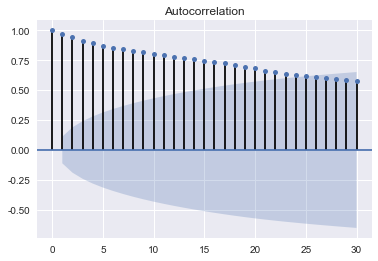

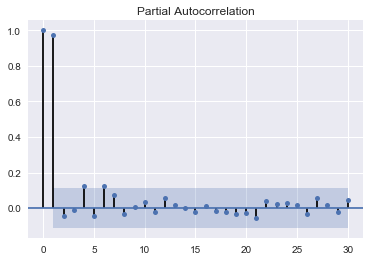

In [9]:
#上证综指收盘指数

plot_acf(sh_data['price'],use_vlines=True,lags=30);# 自相关系数缓慢下降，非平稳
plot_pacf(sh_data['price'],use_vlines=True,lags=30);

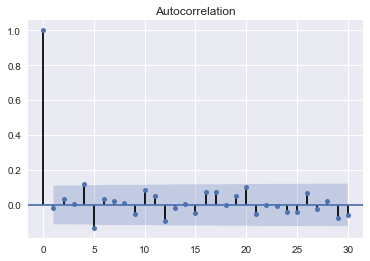

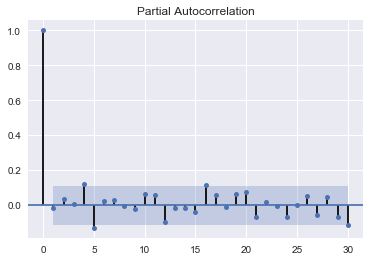

In [10]:
#上证综指收益率指数

plot_acf(sh_data['return'],use_vlines=True,lags=30);
plot_pacf(sh_data['return'],use_vlines=True,lags=30);

2.3单位根检验

In [11]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(sh_data['return'])
adf_test

(-7.7359515442399625,
 1.0936010017802664e-11,
 4,
 305,
 {'1%': -3.4519735736206991,
  '10%': -2.5718441306100512,
  '5%': -2.8710633193086648},
 -1391.6622120666345)

In [14]:
from arch.unitroot import ADF

adf_return = ADF(sh_data['return'])

print(adf_return.summary().as_text())

True
   Augmented Dickey-Fuller Results   
Test Statistic                 -7.736
P-value                         0.000
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [15]:
adf_price = ADF(sh_data['price'])
print(adf_price.summary().as_text())

True
   Augmented Dickey-Fuller Results   
Test Statistic                  1.600
P-value                         0.998
Lags                                5
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


# 3.白噪声

Text(0.5,1,'white noise')

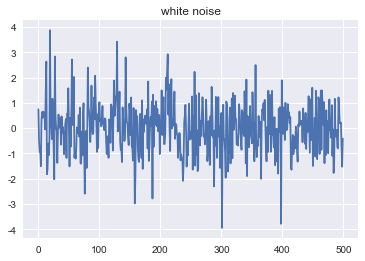

In [18]:
#生成随机游走序列

whitenoise = np.random.standard_normal(500)

plt.plot(whitenoise)
plt.title('white noise')

白噪声检验——Ljung-box检验

In [20]:
ljungbox1 = stattools.q_stat(acf(sh_data['return'])[1:13],len(sh_data['return']))
ljungbox1

(array([  0.07112169,   0.4761968 ,   0.49314026,   5.09725482,
         10.59111626,  10.94059147,  11.09280039,  11.12598843,
         11.95500259,  14.38929568,  15.2568823 ,  18.06995311]),
 array([ 0.78971056,  0.78812514,  0.92039586,  0.27746332,  0.06011746,
         0.09022997,  0.13462203,  0.19466221,  0.21585795,  0.15596358,
         0.17103619,  0.11358295]))

In [21]:
ljungbox1[1][-1]

0.11358295411602168

In [22]:
ljungbox2 = stattools.q_stat(acf(sh_data['price'])[1:13],len(sh_data))
ljungbox2[1][-1]

0.0